<a href="https://colab.research.google.com/github/Kutiolajide07/Basic-Pandas/blob/main/Linear_Regression%2C_Decision_Tree_and_Random_Forest_Model_Comparison_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

import warnings

In [2]:
df = pd.read_csv('/content/Data_for_UCI_named.csv')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [3]:
 # check the dataframe
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df2 =df.copy()

## stab is the predicted column

In [5]:
# check for any missing values in dataset

df.isna().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

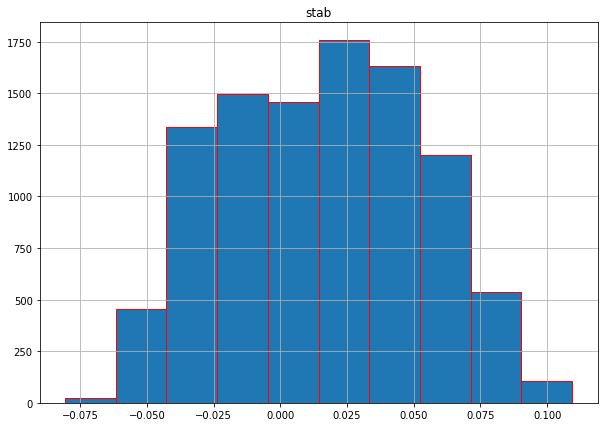

In [6]:
# Target column Analysis
df.hist('stab', edgecolor = 'red', figsize = (10, 7));

In [7]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [8]:
# to check for the highest stab value

df[df.stab == df.stab.max()]


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
4444,7.907289,6.694166,6.752548,5.195423,2.980842,-0.792665,-0.760323,-1.427854,0.937835,0.827174,0.762719,0.962502,0.109403,unstable


In [9]:
# to check for the cheapest expensive car

df[df.stab == df.stab.min()]

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
2433,1.720416,0.961461,7.976768,1.363837,3.299132,-1.074233,-1.099751,-1.125147,0.902871,0.632256,0.54442,0.266887,-0.08076,stable


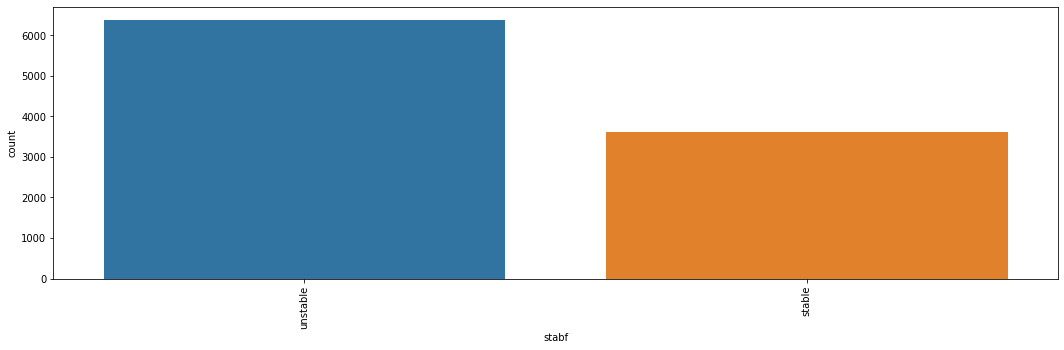

In [10]:
# Visualize the categorical variable 
plt.figure(figsize = (18,5))
sns.countplot (x = 'stabf', data=df, order =df.stabf.value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [11]:
#select only the numeric variables
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [12]:
vars_to_use = df.columns[df.dtypes != 'object'].to_list()
vars_to_use

['tau1',
 'tau2',
 'tau3',
 'tau4',
 'p1',
 'p2',
 'p3',
 'p4',
 'g1',
 'g2',
 'g3',
 'g4',
 'stab']

In [13]:
df_for_analysis = df.loc[:, vars_to_use]
df_for_analysis.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860


In [14]:
df_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
dtypes: float64(13)
memory usage: 1015.8 KB


## Machine Learning Process using Linear regression to predict the outcome (stab)







Divide the data into training and test data using sklearn

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_data, test_data = train_test_split(
 df_for_analysis, test_size=0.2, random_state=42   
)

In [17]:
train_data.shape

(8000, 13)

In [18]:
test_data.shape

(2000, 13)

In [19]:
df_for_analysis.shape

(10000, 13)

In [20]:
train_data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
9254,6.587242,8.255999,8.109960,4.457904,4.332937,-1.073779,-1.371388,-1.887770,0.166933,0.612514,0.792247,0.836127,0.063720
1561,0.676193,0.781086,5.556240,3.765235,2.931210,-1.062958,-1.175796,-0.692456,0.740131,0.772031,0.420697,0.839775,-0.047254
1670,4.757109,8.891698,1.778212,9.795918,5.238057,-1.961965,-1.705948,-1.570144,0.850271,0.601201,0.302983,0.126409,0.014128
6087,3.343688,8.461652,8.675216,2.197498,3.360289,-1.189211,-1.064192,-1.106886,0.961836,0.686392,0.444109,0.696517,0.024980
6669,7.581260,4.061263,6.192641,6.557269,3.221193,-1.433562,-0.591071,-1.196560,0.217076,0.680618,0.457295,0.726299,0.050475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,3.216954,1.561568,7.399332,1.219421,4.001156,-0.757407,-1.863784,-1.379964,0.263501,0.911023,0.865559,0.906780,-0.040906
5191,7.730023,8.899012,6.714530,0.889282,3.538269,-1.356540,-1.379289,-0.802440,0.190749,0.663272,0.183154,0.709821,-0.018474
5390,6.059670,6.724599,1.519847,3.760452,2.613370,-0.743728,-0.533816,-1.335826,0.640419,0.474879,0.546616,0.346686,0.011865
860,0.521154,4.363636,1.134858,0.831704,3.248480,-0.731272,-1.833907,-0.683301,0.386320,0.336058,0.883860,0.871166,-0.048439


In [21]:
test_data

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
6252,1.953136,9.692422,6.570391,7.737644,5.128952,-1.860248,-1.380687,-1.888018,0.487235,0.934229,0.433606,0.328522,0.035629
4684,4.613690,9.423079,1.424423,7.372338,4.655631,-1.716394,-1.182286,-1.756951,0.395106,0.772211,0.911199,0.328193,0.002383
1731,2.738001,1.341172,7.986504,9.842747,5.007610,-1.275363,-1.877241,-1.855006,0.162310,0.175994,0.897505,0.601356,0.030620
4742,2.006512,2.311770,4.410704,2.726592,4.396237,-1.532751,-1.327943,-1.535543,0.053894,0.573440,0.061032,0.775629,-0.021962
4521,3.993497,3.742481,8.975171,1.182813,2.875057,-1.170108,-1.117862,-0.587086,0.100005,0.753533,0.437366,0.611471,-0.039032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,5.117675,3.088960,2.976820,2.466869,4.117734,-1.615723,-1.686818,-0.815193,0.975329,0.131288,0.624945,0.319099,0.022469
8285,7.389044,4.188243,7.833049,8.318825,4.377603,-1.807714,-1.251285,-1.318604,0.247289,0.560363,0.721662,0.814183,0.063562
7853,2.577338,3.053335,4.766831,2.724220,3.773472,-0.685856,-1.979726,-1.107890,0.212701,0.611949,0.713549,0.790318,0.035019
1095,7.408768,8.290950,9.408268,3.786504,2.718477,-0.525626,-1.047839,-1.145012,0.851844,0.771679,0.411093,0.551705,0.069179


model buiding is on training data

In [22]:
#statmodel is a python package used for all statistical models

import statsmodels.api as sm
import statsmodels.formula.api as smf

In [23]:
train_data.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2',
       'g3', 'g4', 'stab'],
      dtype='object')

In [24]:
reg_model = smf.ols(formula = 'stab ~ tau1 + tau2 + tau3 + tau4 + p1 + p2 + p3 + p4 + g1 + g2 + g3 + g4', data=train_data).fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   stab   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.647
Method:                 Least Squares   F-statistic:                     1222.
Date:                Thu, 15 Sep 2022   Prob (F-statistic):               0.00
Time:                        14:43:47   Log-Likelihood:                 19207.
No. Observations:                8000   AIC:                        -3.839e+04
Df Residuals:                    7987   BIC:                        -3.830e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1439      0.002    -79.750      0.0

for every one increase in the unit of tau1 by 0.0036 leads to increase in the value of stab i.e the higher the tau1 the higher the stab(dependent variable) value while other variables remains constant.

if the objective is inference, we stop at this model and start interpreting everything we have here, but if not we can go further to make predictions.

# MAKING PREDICTION - after making the model, it is time to predict the test data

In [25]:
predictions = reg_model.predict(test_data)
predictions

6252    0.038521
4684    0.036185
1731    0.010429
4742   -0.044686
4521   -0.004254
          ...   
6412   -0.014836
8285    0.050507
7853   -0.005409
1095    0.062773
6929    0.009517
Length: 2000, dtype: float64

In [26]:
# how to know if the model has predicted a value close to the actual/true value. to know this we need to compare the true value with the predicted value

test_data.stab

6252    0.035629
4684    0.002383
1731    0.030620
4742   -0.021962
4521   -0.039032
          ...   
6412    0.022469
8285    0.063562
7853    0.035019
1095    0.069179
6929    0.037056
Name: stab, Length: 2000, dtype: float64

In [27]:
pd.DataFrame({'Actual' :test_data.stab, 'Predicted': predictions})

,Actual,Predicted
6252,0.035629,0.038521
4684,0.002383,0.036185
1731,0.030620,0.010429
4742,-0.021962,-0.044686
4521,-0.039032,-0.004254
...,...,...
6412,0.022469,-0.014836
8285,0.063562,0.050507
7853,0.035019,-0.005409
1095,0.069179,0.062773


Compare the Actual and Predicted Visually

In [28]:
pred_df = pd.DataFrame({'Actual' :test_data.stab, 'Predicted': predictions})
pred_df.head()

,Actual,Predicted
6252,0.035629,0.038521
4684,0.002383,0.036185
1731,0.030620,0.010429
4742,-0.021962,-0.044686
4521,-0.039032,-0.004254


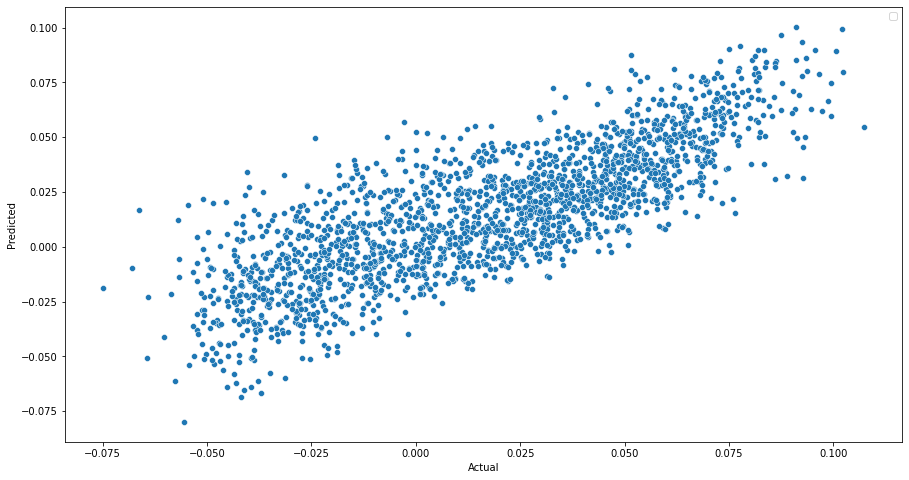

In [29]:
plt.figure(figsize = (15, 8))
sns.scatterplot (x= 'Actual', y='Predicted', data=pred_df)
plt.legend();


#if the model predicts well, we will have a straight clusters heading upward right like a diagonal straight line, as shown here.This means the model is doing well even though it can be improved on

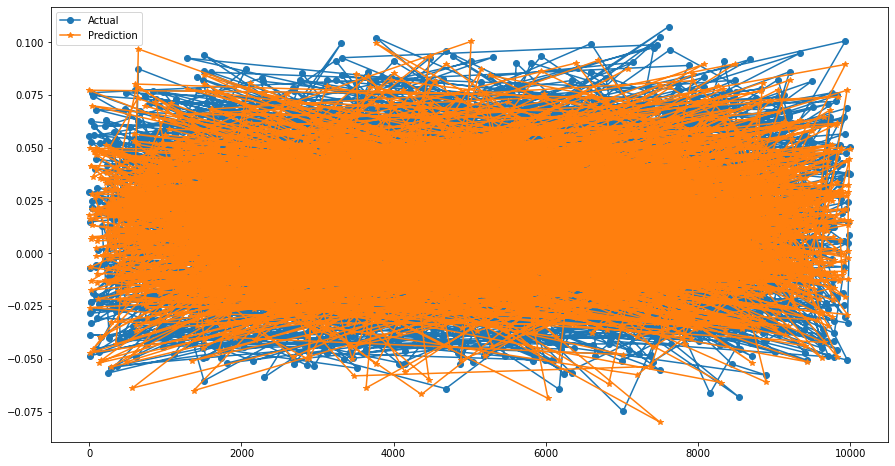

In [30]:
plt.figure(figsize = (15, 8))
plt.plot(test_data.stab,'o-', label = 'Actual')
plt.plot(predictions, '*-', label = 'Prediction')
plt.legend();

#plotting 2000  values as a line made the visuals this way

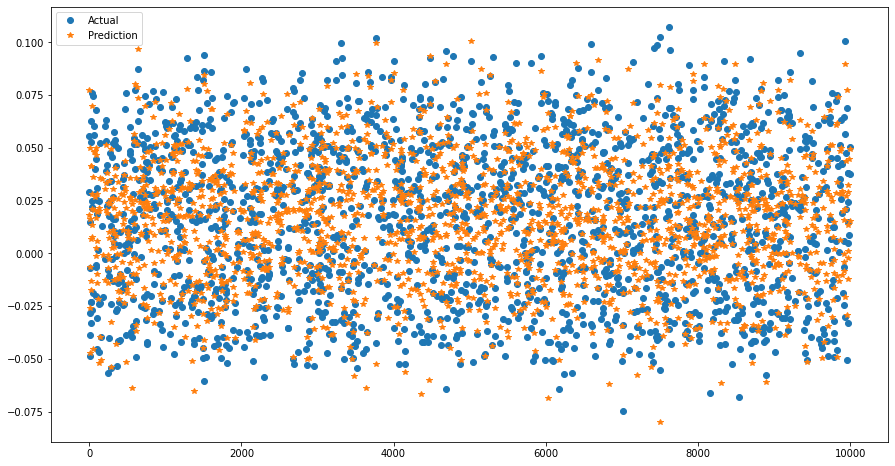

In [31]:
plt.figure(figsize = (15, 8))
plt.plot(test_data.stab,'o', label = 'Actual')
plt.plot(predictions, '*', label = 'Prediction');
plt.legend();


# PERFORMANCE EVALUATION


At this point, we conduct performance evaluation because both actual and predicted value seems far from each other. we can use

1. MAPE(mean absolute percnetage error),
2. RMSE(Root Mean Squared Error),
3. MAE or
4. R-squared. we want to find a single value that qauntify how well our model is doing

In [32]:
#RMSE compares the actual value with the predicted value by using the sqaure, then find the mean and also the sqaure root, the close the RMSE value to 0, the more likely the predicted value is closer to actual value, this means the model is 100% correct and vice-versa. 
#The RMSE tries to give a single value to the comparison of the predicted and actual value, the close to 0 the more likely the model is doing well


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score


RMSE = mean_squared_error(test_data.stab, predictions)
print(f'RMSE: {np.sqrt(RMSE)},')   

RMSE: 0.021959876736963986,


As shown above, the RMSE returns 0.021959876736963986 which is not too far from Zero, we can say this model is good while we look for ways to improve it or develop another model than can return better result

In [33]:
# we can try to put the error in percentage using the MAPE-Mean Absolute Percentage Error, we have 115% of erro in the model, the prediction is 115% above actual value

MAPE = mean_absolute_percentage_error(test_data.stab, predictions)
print (f'MAPE: {MAPE * 100}%')

MAPE: 517.104594622421%


In [34]:
#why do I have a high MAPE here ?
#also doinf the likes of accuracy, precision, recall and F1
#confusion matrix 
#validation
#if y is the target variable or dependent variable  while x is the independent variable

#is it the x variable that we plit into train and test or the complete dataset

In [35]:
#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(reg_model, df_for_analysis, test_data, cv= 5  )
#scores 

#DECISION TREE

In [36]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [37]:
tree = DecisionTreeRegressor(random_state=42, max_depth=3)

In [38]:
tree.fit(train_data.drop ('stab', axis=1), train_data.stab)


DecisionTreeRegressor(max_depth=3, random_state=42)

Plot Decision Tree

In [39]:
feature = train_data.drop ('stab', axis=1).columns.to_list()
feature 

['tau1',
 'tau2',
 'tau3',
 'tau4',
 'p1',
 'p2',
 'p3',
 'p4',
 'g1',
 'g2',
 'g3',
 'g4']

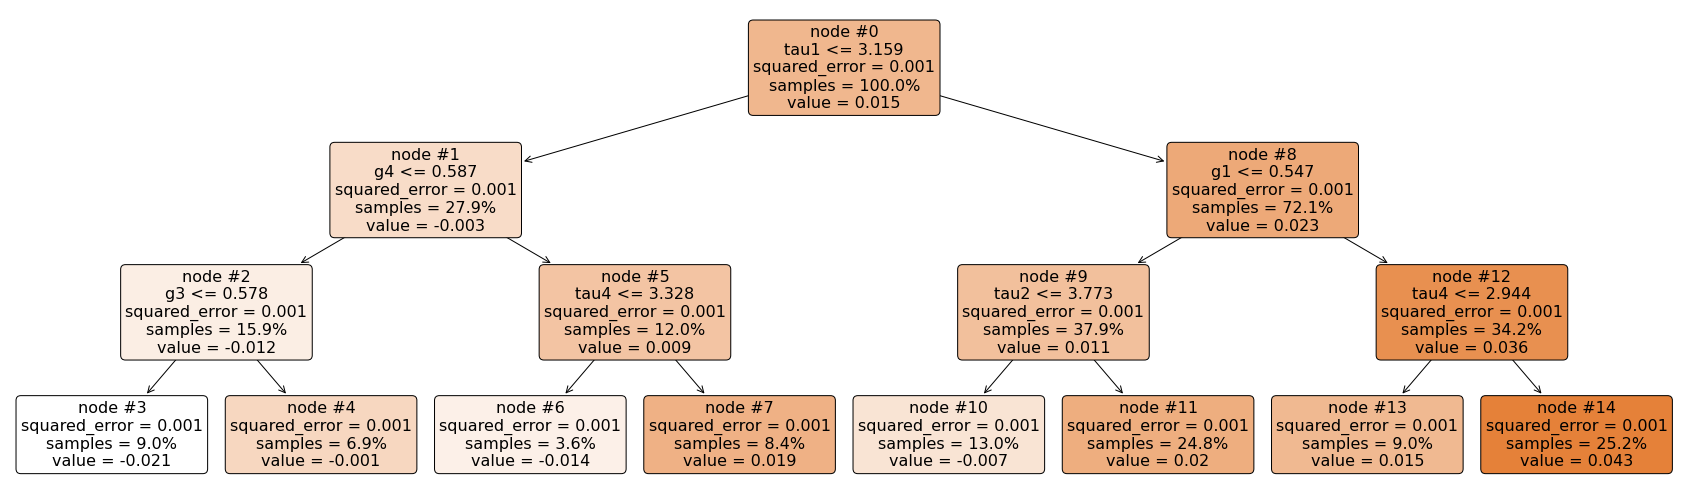

In [40]:
plt.figure(figsize= (30,9))

plot_tree(tree,
          filled = True,
          feature_names = feature,
          proportion = True,
          node_ids = True,
          rounded = True,
          fontsize = 16
    
);

The above splitting is done based on reduction in the sqaured error, any variable that leads to greatest reduction in error is splitted

1. root node is node#0
2. Internal Nodes is node #1, #8,#2, #5, #9, #12
3. Terminal nodes or leave nodes is no#3, #4, #6, #7, #10, #11, #13, #14

In [41]:
train_data[train_data.tau1 <= 3.159 ].stab.mean()

-0.00333204260797491

In [42]:
train_data[train_data.tau1 <= 3.159 ].shape

(2232, 13)

In [43]:
train_data.shape

(8000, 13)

In [44]:
(2232/8000)*100 # as shown in node#1 

27.900000000000002

In [45]:
#to predict this value with index 6252

predicted_value = test_data.loc[[6252], :]
predicted_value

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
6252,1.953136,9.692422,6.570391,7.737644,5.128952,-1.860248,-1.380687,-1.888018,0.487235,0.934229,0.433606,0.328522,0.035629


In [46]:
tree.predict(predicted_value.drop ('stab', axis = 1))

array([-0.02128399])

THe actual value is 0.035629 for index 6252 while the predicted value is -0.02128399 , the difference there of will be the error rate. 

How we got the predicted value shown in Node 3:
The value predicted is -0.02128399 while the value in node 3 is -0.021. we can assume this model is doing well

#NOTE THAT WE ARE LOOKING FOR THE MODEL CLOSS TO THE TRUE VALUE BY MININMIZING THE LOST OR COST COST FUNCTION

#MODEL COMPARISON

compare Linear regression and decision tree using the pipeline

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

In [48]:
# put all variables on same scale through upscaling or downscaling and we can also referr to this as normalisation

from sklearn.preprocessing import StandardScaler, MinMaxScaler

Linear Regression

In [49]:
lr_pipe = Pipeline(steps =[
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
    
])

In [50]:
lr_pipe.fit(train_data.drop('stab', axis = 1), train_data.stab)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

Decision Tree

In [51]:
dt_pipe = Pipeline(steps =[
    ('scaler', StandardScaler()),
    ('regressor', DecisionTreeRegressor(random_state= 42))
    
])

dt_pipe.fit(train_data.drop('stab', axis = 1), train_data.stab)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', DecisionTreeRegressor(random_state=42))])

compare performance

In [52]:
dt_pred = dt_pipe.predict(test_data.drop ('stab', axis=1))
lr_pred = lr_pipe.predict(test_data.drop ('stab', axis=1))

In [53]:
dt_pred

array([ 0.05921203, -0.00269952,  0.01801816, ..., -0.00556283,
        0.08883908,  0.05566415])

In [54]:
lr_pred

array([ 0.0385213 ,  0.03618549,  0.01042931, ..., -0.00540924,
        0.06277345,  0.00951742])

In [55]:
print('Linear Regression metrics:\
  \n==============================')
print (f' 1. RMSE: {np.sqrt(mean_squared_error(test_data.stab, lr_pred))}\
    \n2. MAPE: {mean_absolute_percentage_error(test_data.stab, lr_pred)*100}%\
    \n3. R2: {r2_score(test_data.stab, lr_pred)}\
    \n4. MAE: {mean_squared_error(test_data.stab, lr_pred)} ')

print('')

print('Decision tree metrics:\
  \n==============================')
print (f' 1. RMSE: {np.sqrt(mean_squared_error(test_data.stab, dt_pred))}\
    \n2. MAPE: {mean_absolute_percentage_error(test_data.stab, dt_pred)*100}%\
    \n3. R2: {r2_score(test_data.stab, dt_pred)}\
    \n4. MAE: {mean_squared_error(test_data.stab, dt_pred)} ')
 

Linear Regression metrics:  
 1. RMSE: 0.0219598768198001    
2. MAPE: 517.1043475713834%    
3. R2: 0.6444652366661119    
4. MAE: 0.00048223618994079365 

Decision tree metrics:  
 1. RMSE: 0.02022823195323865    
2. MAPE: 572.9374176447101%    
3. R2: 0.6983258331689458    
4. MAE: 0.00040918136795402516 


some metrics are better off in the model: 
 RMSE and MAE are better in Decision tree when compared to Linear Regression, while MAPE and R2 are better in the Linear regression as compared with Decision tree

In [56]:
pd.DataFrame ({'Actual': test_data.stab, 'Linear Regression': lr_pred, 'Decision Tree': dt_pred})

,Actual,Linear Regression,Decision Tree
6252,0.035629,0.038521,0.059212
4684,0.002383,0.036185,-0.002700
1731,0.030620,0.010429,0.018018
4742,-0.021962,-0.044686,0.032127
4521,-0.039032,-0.004254,-0.024157
...,...,...,...
6412,0.022469,-0.014836,0.038563
8285,0.063562,0.050507,0.024871
7853,0.035019,-0.005409,-0.005563
1095,0.069179,0.062773,0.088839


to know the most important variable, we need to adopt what we called, feature importance, if a variable leads to a significant reductioion in error, it is assumed such variable is very important. The ttal by which a cost function is reduced/split over a predictor is documented

# FEATURE IMPORTANCE

The above splitting is done based on reduction in the sqaured error, any variable that leads to greatest reduction in error is splitted

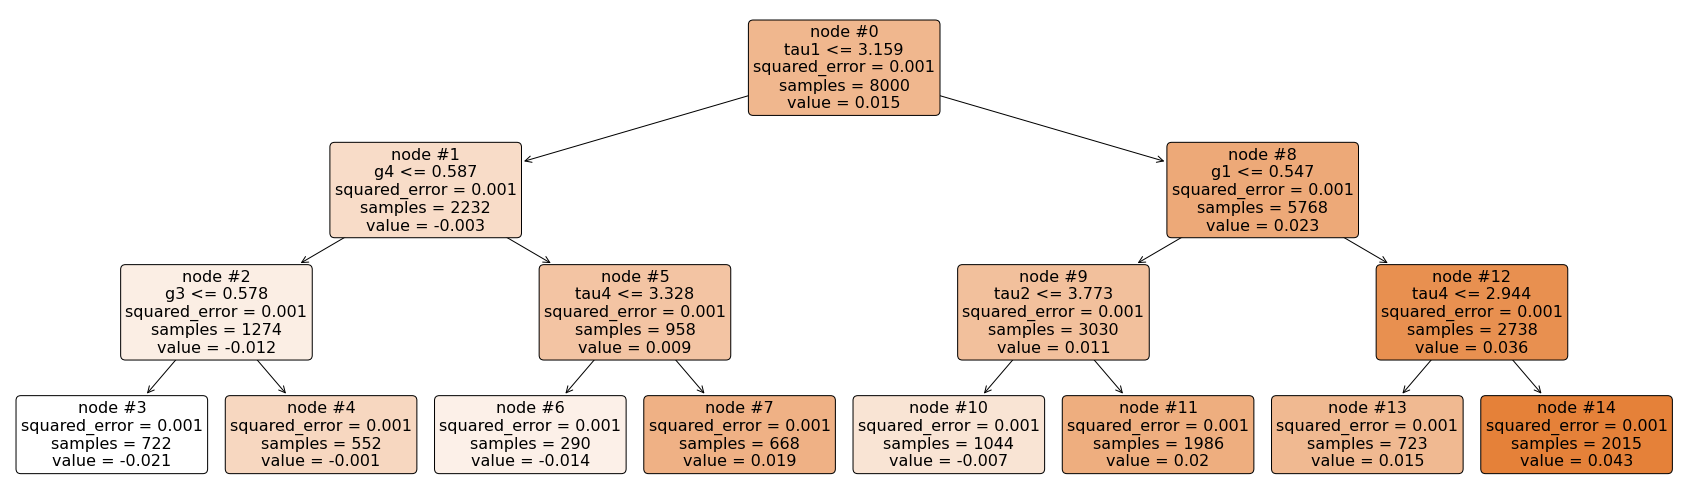

In [57]:
plt.figure(figsize= (30,9))

plot_tree(tree,
          filled = True,
          feature_names = feature,
          proportion = False,
          node_ids = True,
          rounded = True,
          fontsize = 16
    
);


#why do i have a constant squarederro ?

In [58]:
2232/8000

0.279

In [59]:
5768/8000


0.721

In [60]:
node_0 = 0.001 * 8000 - (0.279 * 0.001) - (0.721*0.001)
node_0

7.999

In [61]:
from sklearn import tree

DEcision tree often over fit the training data:
when a decision tree is built, it does well on training data and when we try to use it on test data, it does not do well, this is called over fitting

# RANDOM FOREST

This tends to bring many decision trees together. The prediction is chosen between all trees in the forest. RF is an ensemble learning technique that can be used for bother classification and regression. 

* RF helps to combine many decision trees to have a stronger one

* Ensemble learning means combinning multiple algorithm to obtain an improved version of the existing one. 

* it is important to note that ensemble means the combination of different algorithm to form a stronger algorithm

* Ensemble method uses different approach to combile different algortithm while the Random forest uses the bagging (boot strap aggregation) approach for it's ensenble approach

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_pipe = Pipeline(steps =[
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor(random_state= 42))
    
])

rf_pipe.fit(train_data.drop('stab', axis = 1), train_data.stab)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor(random_state=42))])

In [64]:
dt_pred = dt_pipe.predict(test_data.drop ('stab', axis=1))
lr_pred = lr_pipe.predict(test_data.drop ('stab', axis=1))
rf_pred = rf_pipe.predict(test_data.drop ('stab', axis=1))

In [65]:
print('Linear Regression metrics:\
  \n==============================')
print (f' 1. RMSE: {np.sqrt(mean_squared_error(test_data.stab, lr_pred))}\
    \n2. MAPE: {mean_absolute_percentage_error(test_data.stab, lr_pred)*100}%\
    \n3. R2: {r2_score(test_data.stab, lr_pred)}\
    \n4. MAE: {mean_squared_error(test_data.stab, lr_pred)} ')

print('')

print('Decision tree metrics:\
  \n==============================')
print (f' 1. RMSE: {np.sqrt(mean_squared_error(test_data.stab, dt_pred))}\
    \n2. MAPE: {mean_absolute_percentage_error(test_data.stab, dt_pred)*100}%\
    \n3. R2: {r2_score(test_data.stab, dt_pred)}\
    \n4. MAE: {mean_squared_error(test_data.stab, dt_pred)} ')

print('')

print('Random Forest metrics:\
  \n==============================')
print (f' 1. RMSE: {np.sqrt(mean_squared_error(test_data.stab, rf_pred))}\
    \n2. MAPE: {mean_absolute_percentage_error(test_data.stab, rf_pred)*100}%\
    \n3. R2: {r2_score(test_data.stab, rf_pred)}\
    \n4. MAE: {mean_squared_error(test_data.stab, rf_pred)} ')


Linear Regression metrics:  
 1. RMSE: 0.0219598768198001    
2. MAPE: 517.1043475713834%    
3. R2: 0.6444652366661119    
4. MAE: 0.00048223618994079365 

Decision tree metrics:  
 1. RMSE: 0.02022823195323865    
2. MAPE: 572.9374176447101%    
3. R2: 0.6983258331689458    
4. MAE: 0.00040918136795402516 

Random Forest metrics:  
 1. RMSE: 0.012057490244064448    
2. MAPE: 383.4181251165566%    
3. R2: 0.8928144821689884    
4. MAE: 0.00014538307098570932 


The Random forest seem to be better of when compared to the other algorithm

# FEATURE ENGINEERING
This means different things to different Data Professionals
* it could mean how we narrow down features needed for supervised models
* it could also mean the method of extracting the numerical representation of a structured dataset
* it is also the act of manipulating and tranforming data into a format that optimally represents the problem we want to solve through ML algorithm, the tpye of feature engineering to adopt depends on the kind of problem we are trying to solve and also depend on the type of variables we are working with



**Types of Feature Engineering**
* Feature Improvement - making the existing features more useable through tranformation e.g imputing missing observation, standard scaling etc
* Feature Construction - for this case, that feature is not in the existing/default dataset, but we try to augument the dataset by creating new interpretable features from existing ones, for example when predicting the price of a house, a prediction can be made through dividing the price of the house by the square meter and call it price per square meter
* Feature Selection - This means selecting the subset of a feature from an exisitng feature, i.e after conducting a feature selection, choosing only the variables that helps in prediction of the target variable is refered to as feature selection
* Feature Extraction - means using algorithm to create new features automatically. we may have difficulty interpreting this feature extraction eg converting unstructured dataset into structured dataset, suong google berth to match an unstructured dataset
* Feature Learning - This is automatically generating a brand new features eg training some model to reconstruct image for the purpose of learning the optimal representation.This is for advance class, 

it is important to know when to apply which of the feature engineering, some of these features are peculiar to the type of data we are working with either structured or unstructured dataset

**How to Engineer a structured dataset**


**Feature Improvement**

1. Imputing Data, 
2. Value Normalizing

**importing data** (numeric data)
1. mean/median imputation
2. Arbitrary value imputation (replacing missing value with constant value)
3. End of tail imputation

**importing data** (categorical data, qualitative variables)
1. Arbitrary value imputation (replacing missing value with constant value e.gfilling missing values in gender related data with 'Unknown' )
2. Fill with the most frequent category imputation

when we have 2 categorical data, qualitative varioables we can u use binary no of 0s and 1s to represent the variables but when we have more than 2 variables, we will use one-hot encoding

## TO IMPROVE THE MODEL

In [66]:
df2

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385,0.023892,unstable
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120,-0.025803,stable
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984,-0.031810,stable
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391,0.037789,unstable


In [67]:
df2.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

In [68]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


In [69]:
df2.stabf.value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

In [70]:
numeric_cols = df2.select_dtypes(include = ['float64']).columns.to_list()
numeric_cols.remove('stab')
#categorical_cols = df2.select_dtypes(include = ['object']).columns.to_list()
categorical_cols = ['stabf']

#speak to IB on the numeric data, should the target variable be in it or not

In [71]:
df2[numeric_cols]

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.930406,9.487627,2.376523,6.187797,3.343416,-0.658054,-1.449106,-1.236256,0.601709,0.779642,0.813512,0.608385
9996,3.392299,1.274827,2.954947,6.894759,4.349512,-1.663661,-0.952437,-1.733414,0.502079,0.567242,0.285880,0.366120
9997,2.364034,2.842030,8.776391,1.008906,4.299976,-1.380719,-0.943884,-1.975373,0.487838,0.986505,0.149286,0.145984
9998,9.631511,3.994398,2.757071,7.821347,2.514755,-0.966330,-0.649915,-0.898510,0.365246,0.587558,0.889118,0.818391


In [72]:
df2[categorical_cols]

,stabf
0,unstable
1,stable
2,unstable
3,unstable
4,unstable
...,...
9995,unstable
9996,stable
9997,stable
9998,unstable


In [73]:
categorical_cols

['stabf']

In [74]:
numeric_cols

['tau1',
 'tau2',
 'tau3',
 'tau4',
 'p1',
 'p2',
 'p3',
 'p4',
 'g1',
 'g2',
 'g3',
 'g4']

In [75]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import set_config
set_config(display = 'diagram')

In [76]:
#perform feature engineering on the categorical and numeric variabes
numeric_engineering = Pipeline (steps=[
    ('Imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_engineering =  Pipeline (steps=[
    ('Imputer', SimpleImputer(strategy='most_frequent')),
    ('OneHot', OneHotEncoder())
 
])

# combine both variables together
feature_engineering =  ColumnTransformer (
    transformers = [
        ('numeric', numeric_engineering, numeric_cols),
        ('categorical', categorical_engineering, categorical_cols)
        
    ],
    remainder = 'drop' # drop any column that is not a categorical variable and numeric variable
    
)

In [77]:
feature_engineering

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2',
                                  'p3', 'p4', 'g1', 'g2', 'g3', 'g4']),
                                ('categorical',
                                 Pipeline(steps=[('Imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('OneHot', OneHotEncoder())]),
                                 ['stabf'])])

# Combine Transformer and Model

In [78]:
random_forest_pipeline = Pipeline(steps =[
    ('feature_engineering', feature_engineering),
    ('regressor', RandomForestRegressor(random_state=42))
    
])

random_forest_pipeline

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tau1', 'tau2', 'tau3',
                                                   'tau4', 'p1', 'p2', 'p3',
                                                   'p4', 'g1', 'g2', 'g3',
                                                   'g4']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['stabf'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [79]:
random_forest_pipeline.fit(df2.drop('stab', axis=1), df2.stab) #speak to IB on this, im having challenge fitting new model

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tau1', 'tau2', 'tau3',
                                                   'tau4', 'p1', 'p2', 'p3',
                                                   'p4', 'g1', 'g2', 'g3',
                                                   'g4']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['stabf'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

Train-test split

In [80]:
X_train, x_test, y_train, y_test = train_test_split(
 df2.drop('stab', axis = 1),df2.stab, test_size=0.2, random_state=42   
)

In [81]:
random_forest_pipeline.fit(X_train, y_train)

Pipeline(steps=[('feature_engineering',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tau1', 'tau2', 'tau3',
                                                   'tau4', 'p1', 'p2', 'p3',
                                                   'p4', 'g1', 'g2', 'g3',
                                                   'g4']),
                                                 ('categorical',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('OneHot',
                                                                   OneHotEncoder())]),
                                                  ['stabf'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [84]:
rf_pred = random_forest_pipeline.predict(x_test)

In [85]:
rf_pred

array([0.02989846, 0.01461993, 0.01792445, ..., 0.02676035, 0.05996295,
       0.03561443])